# Project eBay Car Sales

The aim of this project is to clean the data and analyze the included used car listings. We'll work with a dataset of used cars from eBay Kleinanzeigen, a classifieds section of the German eBay website.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
dane = pd.read_csv('https://query.data.world/s/qhawnnfn6e7ughygt5tjz6xzfhkykk', encoding = 'cp1252')
dane.head(3)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46


In [33]:
dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

Changing columns name with python_style ones

In [34]:
dane.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [35]:
correction = {'dateCrawled' : 'date_crawled' , 'name' : 'name', 'seller' : 'seller', 'offerType' : 'offer_type', 'price' : 'price', 'abtest' : 'abtest',
       'vehicleType' : 'vehicle_type', 'yearOfRegistration' : 'registration_year', 'gearbox' : 'gearbox', 'powerPS':'power_ps', 'model':'model',
       'kilometer':'kilometer', 'monthOfRegistration':'registration_month', 'fuelType':'fuel_type', 'brand':'brand',
       'notRepairedDamage':'unrepaired_damage', 'dateCreated':'ad_created', 'nrOfPictures':'nr_of_pictures', 'postalCode':'postal_code',
       'lastSeen':'last_seen'}

In [36]:
dane=dane.rename(columns=correction)
dane.columns

Index(['date_crawled', 'name', 'seller', 'offer_type', 'price', 'abtest',
       'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
       'kilometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'nr_of_pictures', 'postal_code',
       'last_seen'],
      dtype='object')

In [37]:
dane.describe(include='all')

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,kilometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
count,371528,371528,371528,371528,3.715280e+05,371528,333659,371528.000000,351319,371528.000000,351044,371528.000000,371528.000000,338142,371528,299468,371528,371528.0,371528.00000,371528
unique,280500,233531,2,2,NaN,2,8,NaN,2,NaN,251,NaN,NaN,7,40,2,114,NaN,NaN,182806
top,2016-03-24 14:49:47,Ford_Fiesta,privat,Angebot,NaN,test,limousine,NaN,manuell,NaN,golf,NaN,NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:45:59
freq,7,657,371525,371516,NaN,192585,95894,NaN,274214,NaN,30070,NaN,NaN,223857,79640,263182,14450,NaN,NaN,17
mean,NaN,NaN,NaN,NaN,1.729514e+04,NaN,NaN,2004.577997,NaN,115.549477,NaN,125618.688228,5.734445,NaN,NaN,NaN,NaN,0.0,50820.66764,NaN
std,NaN,NaN,NaN,NaN,3.587954e+06,NaN,NaN,92.866598,NaN,192.139578,NaN,40112.337051,3.712412,NaN,NaN,NaN,NaN,0.0,25799.08247,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,1000.000000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN,NaN,NaN,0.0,1067.00000,NaN
25%,NaN,NaN,NaN,NaN,1.150000e+03,NaN,NaN,1999.000000,NaN,70.000000,NaN,125000.000000,3.000000,NaN,NaN,NaN,NaN,0.0,30459.00000,NaN
50%,NaN,NaN,NaN,NaN,2.950000e+03,NaN,NaN,2003.000000,NaN,105.000000,NaN,150000.000000,6.000000,NaN,NaN,NaN,NaN,0.0,49610.00000,NaN
75%,NaN,NaN,NaN,NaN,7.200000e+03,NaN,NaN,2008.000000,NaN,150.000000,NaN,150000.000000,9.000000,NaN,NaN,NaN,NaN,0.0,71546.00000,NaN


We can see some incorrect data in column registration_name. 'Min' and 'max' takes unacceptable values.

In [38]:
dane['name'].value_counts()

Ford_Fiesta                                              657
BMW_318i                                                 627
Opel_Corsa                                               622
Volkswagen_Golf_1.4                                      603
BMW_316i                                                 523
                                                        ... 
Audi_A4_Avant_Klima_Gruene_Plakette_TÜV_&AU_NEU_XENON      1
Renault_clio_in_gold_450VB_!!                              1
Fiat_Doblo_1.6_Multijet                                    1
Renault_Laguna_1                                           1
BMW_M135i_vollausgestattet_NP_52.720____Euro               1
Name: name, Length: 233531, dtype: int64

In [39]:
dane['name'].unique().shape

(233531,)

In [40]:
dane['vehicle_type'].value_counts()

limousine     95894
kleinwagen    80023
kombi         67564
bus           30201
cabrio        22898
coupe         19015
suv           14707
andere         3357
Name: vehicle_type, dtype: int64

In [41]:
print(dane['brand'].value_counts())

volkswagen        79640
bmw               40274
opel              40136
mercedes_benz     35309
audi              32873
ford              25573
renault           17969
peugeot           11027
fiat               9676
seat               7022
mazda              5695
skoda              5641
smart              5249
citroen            5182
nissan             5037
toyota             4694
sonstige_autos     3982
hyundai            3646
mini               3394
volvo              3327
mitsubishi         3061
honda              2836
kia                2555
alfa_romeo         2345
suzuki             2328
porsche            2215
chevrolet          1845
chrysler           1452
dacia               900
jeep                807
daihatsu            806
subaru              779
land_rover          770
jaguar              621
trabant             591
daewoo              542
saab                530
rover               490
lancia              484
lada                225
Name: brand, dtype: int64


In [42]:
dane['brand'].unique().shape

(40,)

Deleting values with clearly wrong data

We assume that there shouldn't be cars with registration year earlier than 1930 and later that 2023

In [43]:
dane = dane.drop(dane[(dane['registration_year'] < 1930) | (dane['registration_year'] > 2023)].index)

Also there only twelve months within a year

In [44]:
dane = dane.drop(dane[(dane['registration_month'] < 1) | (dane['registration_month'] > 12)].index)

We also assume that car should at least have power of 1 ps and no more that 3000.

In [45]:
dane = dane.drop(dane[(dane['power_ps'] < 1) | (dane['power_ps'] > 3000)].index)

At last, we consider that the minimum price for the car is 1000 and the maximum price is 150000

In [46]:
dane = dane.drop(dane[(dane['price'] < 1000) | (dane['power_ps'] > 150000)].index)

Showing the distribution of values within each column with % and with histogram

In [49]:
from unicodedata import normalize
dist_crawled = dane['date_crawled'].str[:10].value_counts(normalize = True, dropna = False)
dist_crawled

2016-04-03    0.040310
2016-04-04    0.038342
2016-03-12    0.036963
2016-03-20    0.036939
2016-04-02    0.036118
2016-03-14    0.036114
2016-03-28    0.035662
2016-03-07    0.035305
2016-03-19    0.035258
2016-03-21    0.035057
2016-04-01    0.034877
2016-03-29    0.033843
2016-03-09    0.033203
2016-03-30    0.033160
2016-03-26    0.032995
2016-03-25    0.032904
2016-03-08    0.032598
2016-03-11    0.032449
2016-03-15    0.032229
2016-03-10    0.032048
2016-03-22    0.031891
2016-03-23    0.031604
2016-03-31    0.031572
2016-03-27    0.030802
2016-03-17    0.030712
2016-03-24    0.029777
2016-03-16    0.029529
2016-03-05    0.026268
2016-03-13    0.016242
2016-03-06    0.014745
2016-03-18    0.012965
2016-04-05    0.012565
2016-04-06    0.003312
2016-04-07    0.001642
Name: date_crawled, dtype: float64

<Axes: ylabel='Frequency'>

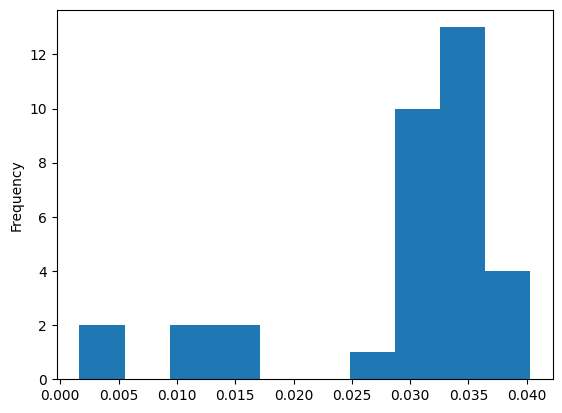

In [50]:
dist_crawled.plot.hist()

The most adds was crawled 2016-04-03 and it was about 13.

In [52]:
dist_ad = dane['ad_created'].str[:10].value_counts(normalize = True, dropna = False)
dist_ad

2016-04-03    0.040526
2016-04-04    0.038409
2016-03-20    0.037026
2016-03-12    0.036806
2016-04-02    0.035977
                ...   
2016-01-15    0.000004
2015-11-02    0.000004
2015-11-13    0.000004
2015-12-06    0.000004
2015-09-09    0.000004
Name: ad_created, Length: 107, dtype: float64

The most adds was also created on 2016-04-03

In [55]:
dist_lastseen = dane['last_seen'].str[:10].value_counts(normalize = True, dropna = False)
dist_lastseen

2016-04-06    0.235681
2016-04-07    0.141208
2016-04-05    0.135589
2016-03-17    0.026496
2016-04-03    0.024438
2016-04-04    0.024292
2016-04-02    0.024269
2016-04-01    0.023133
2016-03-31    0.022925
2016-03-30    0.022233
2016-03-29    0.022037
2016-03-12    0.021483
2016-03-28    0.020882
2016-03-22    0.019248
2016-03-21    0.018627
2016-03-20    0.018544
2016-03-24    0.017951
2016-03-25    0.017715
2016-03-23    0.016835
2016-03-27    0.015594
2016-03-16    0.015107
2016-03-19    0.014918
2016-03-26    0.014773
2016-03-15    0.014533
2016-03-11    0.011688
2016-03-14    0.011315
2016-03-10    0.009944
2016-03-09    0.008420
2016-03-13    0.007618
2016-03-08    0.006879
2016-03-18    0.006483
2016-03-07    0.004483
2016-03-06    0.003575
2016-03-05    0.001084
Name: last_seen, dtype: float64

2016-04-06 was the day that the most ad was seen online by the crawler

Calculating the average price for each brand

In [59]:
unique_brands = dane['brand'].unique()
unique_brands

array(['audi', 'jeep', 'volkswagen', 'skoda', 'peugeot', 'ford', 'mazda',
       'nissan', 'renault', 'mercedes_benz', 'bmw', 'opel', 'citroen',
       'honda', 'mini', 'smart', 'fiat', 'hyundai', 'seat', 'subaru',
       'volvo', 'mitsubishi', 'alfa_romeo', 'kia', 'suzuki', 'lancia',
       'porsche', 'toyota', 'chevrolet', 'dacia', 'sonstige_autos',
       'daihatsu', 'chrysler', 'jaguar', 'rover', 'saab', 'daewoo',
       'land_rover', 'trabant', 'lada'], dtype=object)

In [62]:
avg_brand_price = {}
for b in unique_brands:
  avg_price = dane.loc[dane['brand'] == b, 'price'].mean()
  avg_brand_price[b] = avg_price

avg_brand_price

{'audi': 18947.361070352923,
 'jeep': 13330.263703703704,
 'volkswagen': 9614.079208104498,
 'skoda': 7138.917271407838,
 'peugeot': 4209.441325482679,
 'ford': 12954.110561615067,
 'mazda': 8108.723904813412,
 'nissan': 6580.78802747792,
 'renault': 3680.9743424584003,
 'mercedes_benz': 17245.62707753763,
 'bmw': 10706.40383715489,
 'opel': 5002.9810566952465,
 'citroen': 12579.97583429229,
 'honda': 5209.852459016393,
 'mini': 10155.483174603174,
 'smart': 3978.1821901323706,
 'fiat': 4279.615591397849,
 'hyundai': 6469.593894213703,
 'seat': 5863.285894471305,
 'subaru': 6665.025581395349,
 'volvo': 12306.120651695288,
 'mitsubishi': 5064.905131264916,
 'alfa_romeo': 5462.5771683673465,
 'kia': 6901.480290456431,
 'suzuki': 5221.5009535918625,
 'lancia': 5530.665217391304,
 'porsche': 53491.08722109533,
 'toyota': 5887.75387851696,
 'chevrolet': 7404.312278211498,
 'dacia': 6093.824873096447,
 'sonstige_autos': 1064437.9779614324,
 'daihatsu': 3025.8625730994154,
 'chrysler': 5333.7

In [66]:
max_avg_price = max(avg_brand_price.values())
max_avg_price

1064437.9779614324

Highest average price for brand is around 1064437. The brand is 'sonstige_autos'

In [67]:
brands = dane['brand'].value_counts()
brands.shape
brands

volkswagen        53896
bmw               32055
mercedes_benz     28038
audi              25898
opel              22277
ford              14761
renault            9315
peugeot            7303
fiat               5208
skoda              4823
seat               4757
smart              4155
toyota             3803
mazda              3698
citroen            3476
mini               3150
nissan             3057
hyundai            2817
volvo              2271
sonstige_autos     2178
porsche            1972
kia                1928
honda              1830
mitsubishi         1676
suzuki             1573
alfa_romeo         1568
chevrolet          1409
chrysler            918
dacia               788
jeep                675
land_rover          671
jaguar              533
subaru              430
saab                367
daihatsu            342
lancia              230
daewoo              212
rover               178
trabant             160
lada                130
Name: brand, dtype: int64

In [69]:
top_5 = brands.index[:5]
top_5

Index(['volkswagen', 'bmw', 'mercedes_benz', 'audi', 'opel'], dtype='object')

The most popular brand (with the most sales) is volkswagen. These are the top 5 brands.

In [70]:
top_5_count = dane['brand'].value_counts()
top_5_count = top_5_count[:5]
top_5_count

volkswagen       53896
bmw              32055
mercedes_benz    28038
audi             25898
opel             22277
Name: brand, dtype: int64

Number of sold cars (from top 5)

Calculating average price for top 5 brands.

In [72]:
avg_brand_price_5 = {}
for b in top_5:
  avg_price = dane.loc[dane['brand'] == b, 'price'].mean()
  avg_brand_price_5[b] = avg_price

avg_brand_price_5 = pd.Series(avg_brand_price_5)
avg_brand_price_5

volkswagen        9614.079208
bmw              10706.403837
mercedes_benz    17245.627078
audi             18947.361070
opel              5002.981057
dtype: float64

Mercedes is the most expensive brand from top 5 (17245) and open is the cheapest (5002)

Calculating average disctance traveled

In [75]:
avg_brand_km_5 = {}
for b in top_5:
  avg_km = dane.loc[dane['brand'] == b, 'kilometer'].mean()
  avg_brand_km_5[b] = avg_km
  
avg_brand_km_5 = pd.Series(avg_brand_km_5)
avg_brand_km_5

volkswagen       124694.504230
bmw              131767.742942
mercedes_benz    129343.747771
audi             127173.140783
opel             122458.814023
dtype: float64

In [76]:
df_price = pd.DataFrame(avg_brand_price_5, columns = ['mean_price'])
df_price

,mean_price
volkswagen,9614.079208
bmw,10706.403837
mercedes_benz,17245.627078
audi,18947.361070
opel,5002.981057


In [77]:
df_km = pd.DataFrame(avg_brand_km_5, columns = ['mean_km'])
df_km

,mean_km
volkswagen,124694.504230
bmw,131767.742942
mercedes_benz,129343.747771
audi,127173.140783
opel,122458.814023


In [78]:
df_price_km = df_price
df_price_km['mean_km'] = avg_brand_km_5
df_price_km

,mean_price,mean_km
volkswagen,9614.079208,124694.504230
bmw,10706.403837,131767.742942
mercedes_benz,17245.627078,129343.747771
audi,18947.361070,127173.140783
opel,5002.981057,122458.814023


In [80]:
df_price_km.sort_values('mean_price', axis=0, ascending= False, inplace = True)
df_price_km

,mean_price,mean_km
audi,18947.361070,127173.140783
mercedes_benz,17245.627078,129343.747771
bmw,10706.403837,131767.742942
volkswagen,9614.079208,124694.504230
opel,5002.981057,122458.814023


Making some plots

<Axes: >

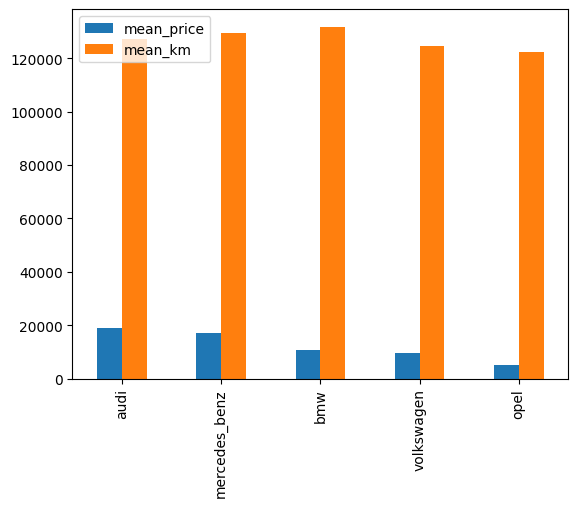

In [83]:
df_price_km.plot(kind='bar', stacked=False)

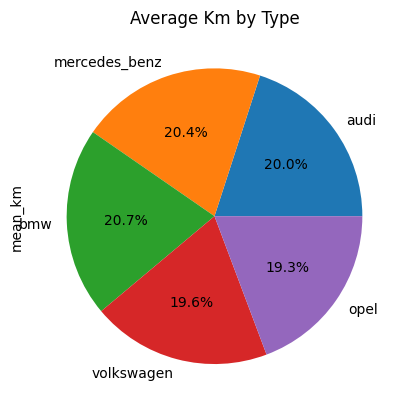

In [84]:
df_price_km['mean_km'].plot(kind='pie',autopct='%1.1f%%')
plt.title('Average Km by Type')
plt.show()

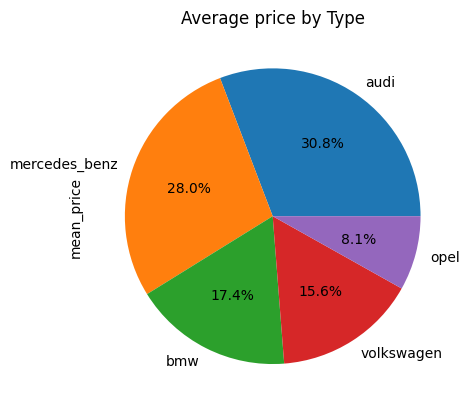

In [85]:
df_price_km['mean_price'].plot(kind='pie',autopct='%1.1f%%')
plt.title('Average price by Type')
plt.show()

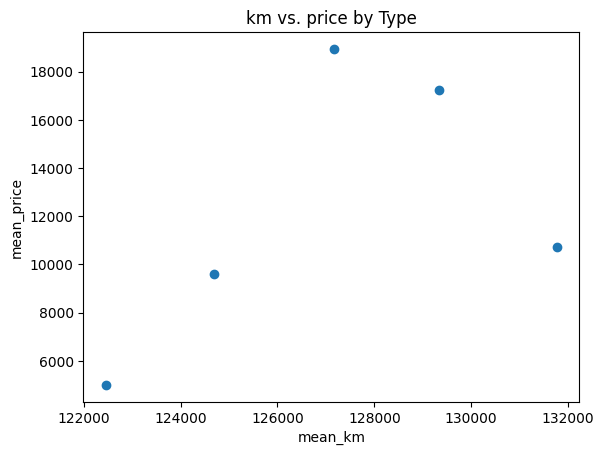

In [87]:
plt.scatter(df_price_km['mean_km'], df_price_km['mean_price'])
plt.title('km vs. price by Type')
plt.xlabel('mean_km')
plt.ylabel('mean_price')
plt.show()

Calculating the best km/price ratio

In [88]:
df_price_km

,mean_price,mean_km
audi,18947.361070,127173.140783
mercedes_benz,17245.627078,129343.747771
bmw,10706.403837,131767.742942
volkswagen,9614.079208,124694.504230
opel,5002.981057,122458.814023


In [90]:
df_price_km['km/price_ratio'] = df_price_km['mean_km']/df_price_km['mean_price']
df_price_km

,mean_price,mean_km,km/price_ratio
audi,18947.361070,127173.140783,6.711918
mercedes_benz,17245.627078,129343.747771,7.500090
bmw,10706.403837,131767.742942,12.307376
volkswagen,9614.079208,124694.504230,12.969989
opel,5002.981057,122458.814023,24.477169


In [93]:
df_price_km.sort_values('km/price_ratio', axis=0, ascending= False, inplace = True)
df_price_km

,mean_price,mean_km,km/price_ratio
opel,5002.981057,122458.814023,24.477169
volkswagen,9614.079208,124694.504230,12.969989
bmw,10706.403837,131767.742942,12.307376
mercedes_benz,17245.627078,129343.747771,7.500090
audi,18947.361070,127173.140783,6.711918


Opel has the best km/price ratio